In [1]:
#Import the Data
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Clustering\\EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape  #(3999, 12)

(3999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
#EDA
#BOXPLOT AND OUTLIERS CALCULATION #
df1 = df[df.columns[[1,2,6,7,8,9,10]]]

In [8]:
from scipy import stats

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [10]:
# Calculate the Z-scores for each column in the DataFrame
z_scores = np.abs(stats.zscore(df1))

In [11]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [12]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]

In [13]:
df.shape  #(3293, 12)

(3677, 12)

array([[<AxesSubplot:title={'center':'ID#'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>],
       [<AxesSubplot:title={'center':'cc1_miles'}>,
        <AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>],
       [<AxesSubplot:title={'center':'Flight_trans_12'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:title={'center':'Award?'}>]], dtype=object)

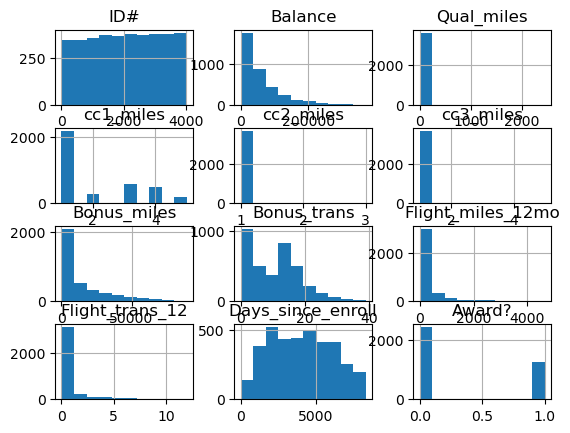

In [15]:
# Now, df contains the data with outliers removed
#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()

In [17]:
df.skew()

ID#                  -0.035132
Balance               1.877450
Qual_miles            7.086760
cc1_miles             0.911231
cc2_miles            11.400819
cc3_miles            25.587419
Bonus_miles           1.582551
Bonus_trans           0.600867
Flight_miles_12mo     3.555426
Flight_trans_12       3.283725
Days_since_enroll     0.144701
Award?                0.677307
dtype: float64

In [18]:
df.kurt()

ID#                   -1.183417
Balance                4.042792
Qual_miles            53.074641
cc1_miles             -0.624936
cc2_miles            137.882399
cc3_miles            714.511405
Bonus_miles            1.914677
Bonus_trans            0.012587
Flight_miles_12mo     14.250253
Flight_trans_12       12.067012
Days_since_enroll     -0.944538
Award?                -1.542095
dtype: float64

In [19]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,2045.513190,60434.353277,39.400054,1.989394,1.014142,1.005167,14410.789774,10.535219,256.386728,0.789230,4060.139788,0.339679
std,1155.926469,61664.122500,248.356124,1.318301,0.146843,0.115339,18233.239147,8.248762,637.018787,1.829636,2051.260604,0.473665
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1057.000000,17500.000000,0.000000,1.000000,1.000000,1.000000,1058.000000,3.000000,0.000000,0.000000,2287.000000,0.000000
50%,2059.000000,39313.000000,0.000000,1.000000,1.000000,1.000000,6000.000000,11.000000,0.000000,0.000000,4010.000000,0.000000
75%,3043.000000,82122.000000,0.000000,3.000000,1.000000,1.000000,21634.000000,16.000000,150.000000,1.000000,5710.000000,1.000000
max,4021.000000,370941.000000,2454.000000,5.000000,3.000000,5.000000,89360.000000,39.000000,4652.000000,12.000000,8296.000000,1.000000


In [25]:
# Create a pairplot for your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

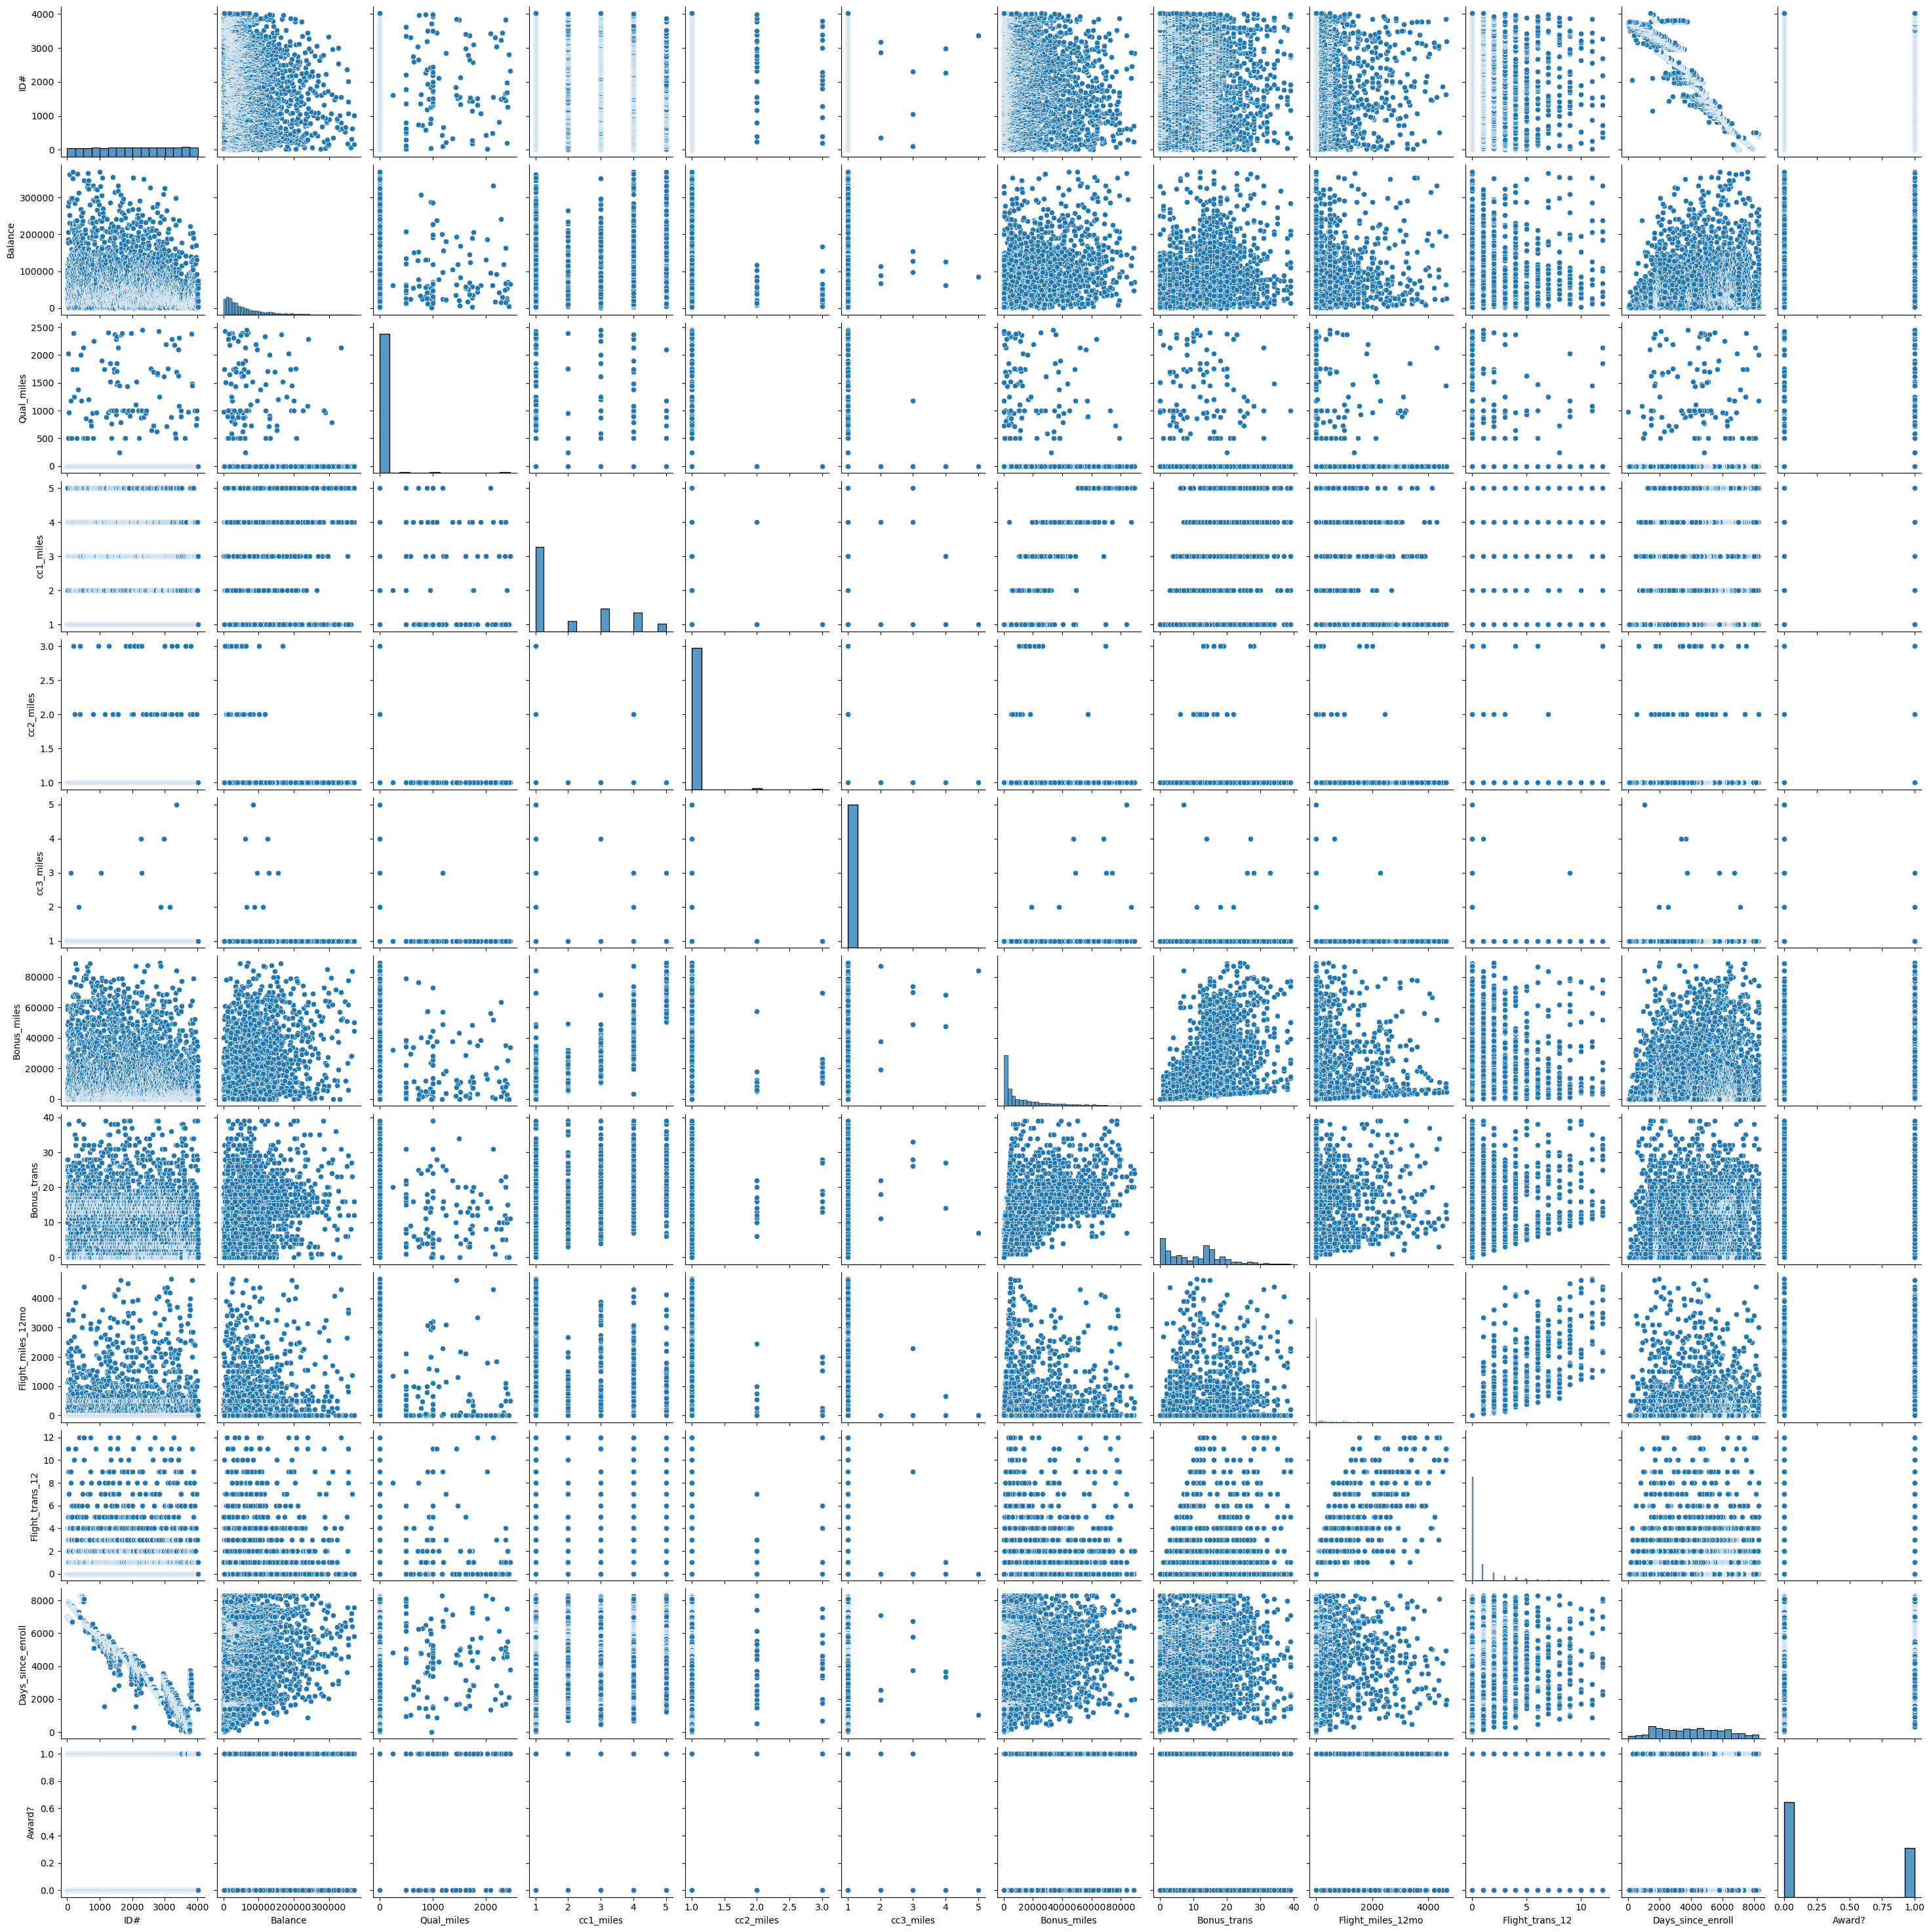

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
# understanding the relationships between all the variables#
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a correlation matrix for your DataFrame
correlation_matrix = df.corr()

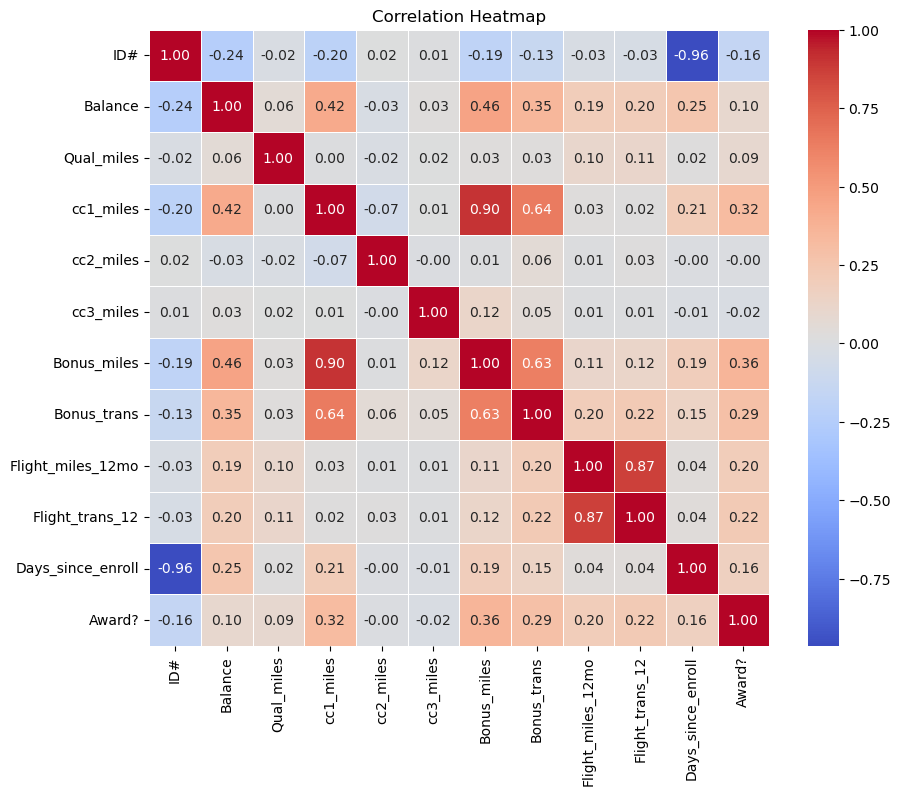

'Values close to 1 indicate a strong positive correlation.\nValues close to -1 indicate a strong negative correlation.\nValues close to 0 indicate a weak or no correlation'

In [29]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
"""Values close to 1 indicate a strong positive correlation.
Values close to -1 indicate a strong negative correlation.
Values close to 0 indicate a weak or no correlation"""

In [30]:
#Dendogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
# Calculate the linkage matrix

In [31]:
linkage_matrix = sch.linkage(df, method='ward')
linkage_matrix

array([[3.26700000e+03, 3.28300000e+03, 2.56124969e+01, 2.00000000e+00],
       [3.51400000e+03, 3.53100000e+03, 2.76767050e+01, 2.00000000e+00],
       [3.41600000e+03, 3.42200000e+03, 6.68804904e+01, 2.00000000e+00],
       ...,
       [7.34500000e+03, 7.34600000e+03, 1.23316029e+06, 1.10100000e+03],
       [7.34900000e+03, 7.35000000e+03, 2.68680830e+06, 1.34000000e+03],
       [7.34800000e+03, 7.35100000e+03, 4.07529334e+06, 3.67700000e+03]])

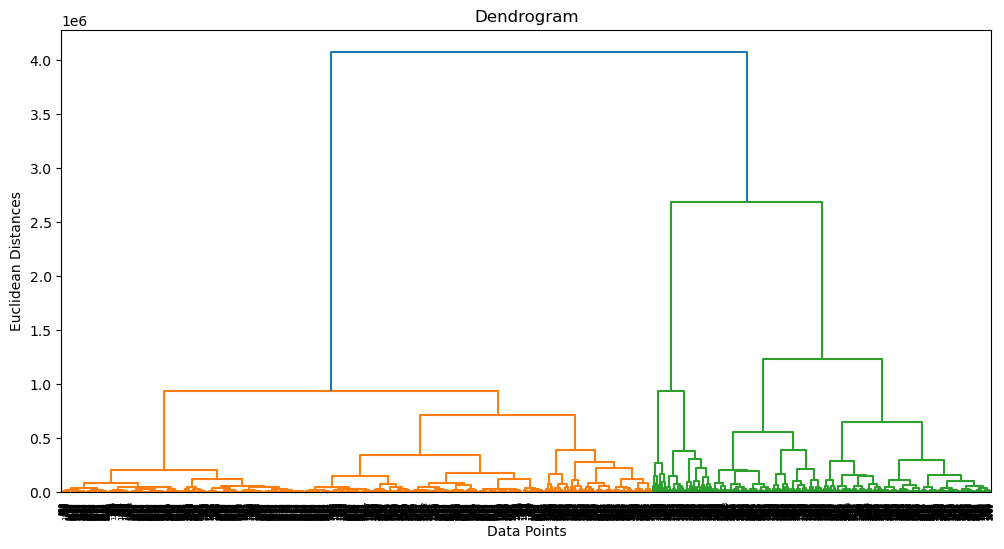

In [32]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [33]:
X =df.iloc[:,0:13]
X

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [34]:
#AgglomerativeClustering
#forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'complete')

In [35]:
Y = cluster.fit_predict(X)

In [36]:
Y_new = pd.DataFrame(Y)

In [37]:
Y_new[0].value_counts()

2    2548
4     583
0     393
1     118
3      35
Name: 0, dtype: int64

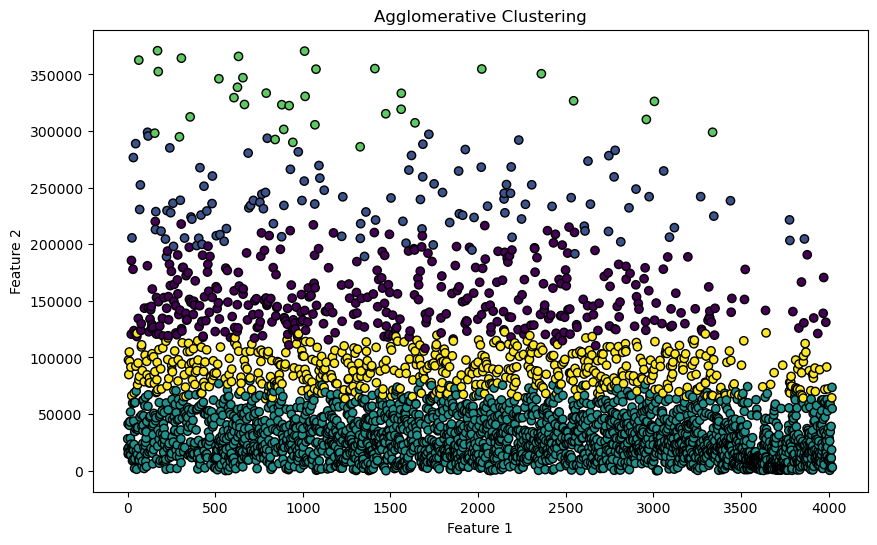

In [38]:
# Create a scatterplot to visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=Y, cmap='viridis', marker='o', edgecolor='k')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [39]:
#performing k means on the same data
#KMeans (Elbow method)
from sklearn.cluster import KMeans

In [41]:
# Specify the number of clusters (k) you want to create
k = 3  # Adjust this value based on your requirements

In [42]:
# Create an instance of the KMeans algorithm
kmeans = KMeans(n_clusters=k, random_state=0)

In [44]:
# Fit the model to your data and get cluster labels
cluster_labels = kmeans.fit_predict(df)

In [45]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

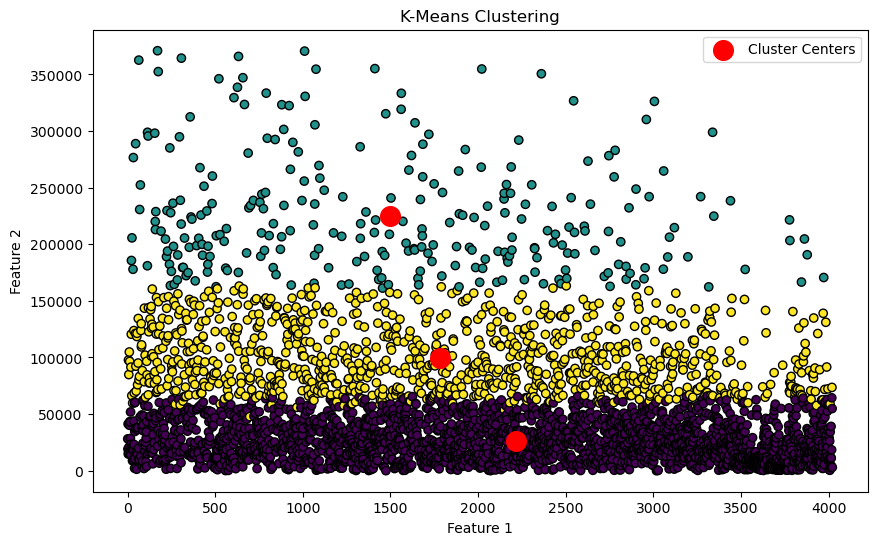

In [46]:
# Create a scatterplot to visualize the K-Means clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [47]:
"""according to the elbow method we can get clarity on upto  which k value should be choosen"""
#DBSCAN
from sklearn.cluster import DBSCAN

In [48]:
# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' as needed

In [49]:
# Fit the model to your data and get cluster labels
cluster_labels = dbscan.fit_predict(df)

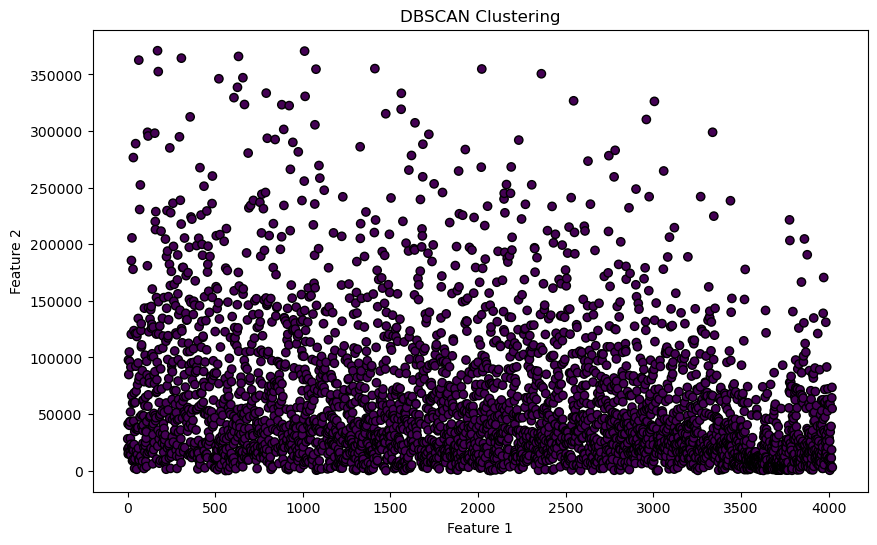

In [50]:
# Create a scatterplot to visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Hierarchical clustering was performed, and the dendrogram was plotted to visualize the hierarchy of clusters,
#The dendrogram suggests the presence of 5 distinct clusters
# K-Means clustering was applied with k=3 clusters based on the elbow method.
# The scatterplot displays the data points colored by the clusters, with red points representing cluster centers.
# DBSCAN clustering was performed with specified parameters (eps=0.5, min_samples=5).
# The scatterplot visualizes the clusters identified by DBSCAN.
# The K-Means algorithm identified three distinct clusters, The dataset may have hierarchical structures, and 
#five main clusters can be identified.,
# through DBSCAN It successfully marked noise points (outliers) separately, providing a clear distinction.